In [1]:
import numpy as np
import scipy as sp

In [17]:
sp.special.erf(1)

0.8427007929497148

In [19]:
(np.arange(0, 20, 1) < 10) * np.arange(0, 20, 1) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
dlt = 1578
xm_big = 0.211
xm_small = 0.00211
inc_gamma(2, dlt**(2/3)*xm_big)

1.124107657479161e-11

In [21]:
np.exp(1)

2.718281828459045

In [58]:
def erf(n):
    return sp.special.erf(n)

def inc_gamma(a, x):
    return sp.special.exp1(x) if a == 0 else sp.special.gamma(a)*sp.special.gammaincc(a, x)

In [34]:
delta = 1578
x_m = 0.0211

gammas = -6*inc_gamma(2, delta**(2/3)*x_m) + 3*inc_gamma(2, (delta-1)**(2/3)*x_m) \
        + 3*inc_gamma(2, (delta+1)**(2/3)*x_m)
erfs = np.pi**0.5 * (delta - 1)*x_m**(3/2)*erf((delta-1)**(1/3)*x_m**0.5) \
        - 2*np.pi**0.5 * (delta)*x_m**(3/2)*erf((delta)**(1/3)*x_m**0.5) \
        + np.pi**0.5 * (delta)*x_m**(3/2)*erf((delta+1)**(1/3)*x_m**0.5) \
        + np.pi**0.5 * x_m**(3/2)*erf((delta+1)**(1/3)*x_m**0.5)
neiths = -2*(delta)**(2/3)*x_m*np.exp(-delta**(2/3)*x_m) - 2*np.exp(-delta**(2/3)*x_m)\
        + (delta - 1)**(2/3) * x_m * np.exp(-(delta-1)**(2/3)*x_m) \
        + (delta + 1)**(2/3) * x_m * np.exp(-(delta+1)**(2/3)*x_m) \
        + np.exp(-(delta-1)**(2/3)*x_m) + np.exp(-(delta+1)**(2/3)*x_m)
        
integral = 3/(4*x_m**3) * (gammas + erfs + neiths)
integral

0.057273386778163723

In [7]:
def eval_and_reduce_cc(len_marks_1):
    res = np.zeros(len_marks_1)
    res[0] = len_marks_1
    res[1:] = np.arange(2, 2*(len_marks_1), 2)[::-1]
    return res

In [2]:
def calc_sf2_chromo_shlk(chrom, k_vec = np.logspace(-3, -1, 30)):
    # calculates sf2 using rank 1 monomer correlation tensor 
    [n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

    M2_AA= eval_and_reduce_cc(len(poly_marks[0]))
    
    M = np.shape(M2_AA)[0]
    nk = len(k_vec)
    N = M*N_m
    
    S2_AA_arr = np.zeros(nk)

    for i, k in enumerate(k_vec):
        C = np.zeros(M)
        k = np.linalg.norm(k)
        x_m = (1/6) * N_m * b**2 * k**2

        #j1 = j2, s1 > s2
        index = 0#(j1 == j2)
        constant = 1
        debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 

    #     C[np.where((index) != 0)] += debye
        C[0] += debye

        #j1 > j2, s1 s2 any
        index = np.arange(0, M, 1)#(j1 > j2) #index = del!
        constant = np.exp(-x_m*index)
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) #for off-diagonal terms

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral

        S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)

    return S2_AA_arr*N**2

In [185]:
def calc_sf2_nuclear(chrom, k_vec = np.logspace(-3, -1, 30)):
    # calculates sf2 using rank 1 monomer correlation tensor 
    # incorporates shift in scaling due to looping behavior in nucleus
    
    [n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

    M2_AA= eval_and_reduce_cc(len(poly_marks[0]))
    
    M = np.shape(M2_AA)[0]
    nk = len(k_vec)
    N = M*N_m
    
    S2_AA_arr = np.zeros(nk)

    
    bp_per_nuc = 190 # bp per nucleosome
    nm_per_bp = 0.34 
    lower_cutoff = 28.89 * 1000 # bp, s1*, from Rubenstein
    upper_cutoff = 399.12 * 1000 # bp, s2*
#     upper_cutoff = lower_cutoff
    
    lc_kuhn = lower_cutoff * (nm_per_bp) * (1/b) # converted to nm, then kuhn lengths
    uc_kuhn = upper_cutoff * (nm_per_bp) * (1/b) 

    for i, k in enumerate(k_vec):
        C = np.zeros(M)
        k = np.linalg.norm(k)
        x_m = (1/6) * N_m * b**2 * k**2
        delta = np.arange(0, M, 1)
        
        
        #j1 = j2, s1 > s2
        
        
        index = 0#(j1 == j2)
        constant = 1
        debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 

        C[0] += debye

        
        # if j1 - j2 < lower_cutoff 
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc <= lower_cutoff) * (np.arange(0, M, 1) != 0) 
        constant = np.exp(-x_m*delta)
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) 

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral        
        
        # intermediate case, 2/3 scaling
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc > lower_cutoff) * (np.arange(0, M, 1) * bp_per_nuc <= upper_cutoff)
        
        x_m = (1/6) * N_m**(2/3) * b**2 * k**2 * (lc_kuhn)**(1/3)
#         x_m = (1/6) * N_m**(2/3) * b**2 * k**2 * (lower_cutoff/bp_per_nuc)**(1/3)
        

        gammas = -6*inc_gamma(2, delta**(2/3)*x_m) + 3*inc_gamma(2, (delta-1)**(2/3)*x_m) \
                + 3*inc_gamma(2, (delta+1)**(2/3)*x_m)
        erfs = np.pi**0.5 * (delta - 1)*x_m**(3/2)*erf((delta-1)**(1/3)*x_m**0.5) \
                - 2*np.pi**0.5 * (delta)*x_m**(3/2)*erf((delta)**(1/3)*x_m**0.5) \
                + np.pi**0.5 * (delta)*x_m**(3/2)*erf((delta+1)**(1/3)*x_m**0.5) \
                + np.pi**0.5 * x_m**(3/2)*erf((delta+1)**(1/3)*x_m**0.5)
        neiths = -2*(delta)**(2/3)*x_m*np.exp(-delta**(2/3)*x_m) - 2*np.exp(-delta**(2/3)*x_m)\
                + (delta - 1)**(2/3) * x_m * np.exp(-(delta-1)**(2/3)*x_m) \
                + (delta + 1)**(2/3) * x_m * np.exp(-(delta+1)**(2/3)*x_m) \
                + np.exp(-(delta-1)**(2/3)*x_m) + np.exp(-(delta+1)**(2/3)*x_m)

        integral = 3/(4*x_m**3) * (gammas + erfs + neiths)

#         integral = ((np.exp(x_m)-1)**2 *  np.exp(-(delta**(2/3)+1)*x_m)  ) /x_m**2

        C[np.where((index) != 0)] += integral[np.where(index != 0)]
        
        
        # if j1 - j2 > upper cutoff -> 1 scaling
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc > upper_cutoff) 
        
        
        x_m = (1/6) * N_m * b**2 * k**2 * (lc_kuhn/uc_kuhn)**(1/3)
        constant = np.exp(-x_m*delta)
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) 

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral   
        

        S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)

    return S2_AA_arr*N**2 

In [230]:
val = np.array([1,2,3,4])
ind = np.array([False, True, True, False])
val[ind]

array([2, 3])

In [233]:
np.pad(val, (2,3))

array([0, 0, 1, 2, 3, 4, 0, 0, 0])

In [236]:
def erf(n):
    return sp.special.erf(n)

def inc_gamma(a, x):
    return sp.special.gamma(a)*sp.special.gammaincc(a, x)

def calc_sf2_nuclear_FIXED(chrom, k_vec = np.logspace(-3, -1, 30)):
    # calculates sf2 using rank 1 monomer correlation tensor 
    # incorporates shift in scaling due to looping behavior in nucleus
    
    [n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

    M2_AA= eval_and_reduce_cc(len(poly_marks[0]))
    
    M = np.shape(M2_AA)[0]
    nk = len(k_vec)
    N = M*N_m
    
    S2_AA_arr = np.zeros(nk)

    
    bp_per_nuc = 190 # bp per nucleosome
    nm_per_bp = 0.34 
    lower_cutoff = 28.89 * 1000 # bp, s1*, from Rubenstein
    upper_cutoff = 399.12 * 1000 # bp, s2*
#     upper_cutoff = lower_cutoff
    
    lc_kuhn = lower_cutoff * (nm_per_bp) * (1/b) # converted to nm, then kuhn lengths
    uc_kuhn = upper_cutoff * (nm_per_bp) * (1/b) 

    for i, k in enumerate(k_vec):
        C = np.zeros(M)
        k = np.linalg.norm(k)
        x_m = (1/6) * N_m * b**2 * k**2
        delta = np.arange(0, M, 1)
        
        
        #j1 = j2, s1 > s2
        
        
        index = 0#(j1 == j2)
        constant = 1
        debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 

        C[0] += debye

        
        # if j1 - j2 < lower_cutoff 
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc <= lower_cutoff) * (np.arange(0, M, 1) != 0) 
        constant = np.exp(-x_m*delta)
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) 

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral        
        
        # intermediate case, 2/3 scaling
        
        index = (np.arange(0, M, 1) * bp_per_nuc > lower_cutoff) * (np.arange(0, M, 1) * bp_per_nuc <= upper_cutoff)
#         print(index[0:10])
        dlta = delta[index]
#         print(len(delta))
#         print(len(dlta))
        
        x_m = (1/6) * N_m**(2/3) * b**2 * k**2 * (lc_kuhn)**(1/3)
#         x_m = (1/6) * N_m**(2/3) * b**2 * k**2 * (lower_cutoff/bp_per_nuc)**(1/3)
        

        gammas = -6*inc_gamma(2, dlta**(2/3)*x_m) + 3*inc_gamma(2, (dlta-1)**(2/3)*x_m) \
                + 3*inc_gamma(2, (dlta+1)**(2/3)*x_m)
        erfs = np.pi**0.5 * (dlta - 1)*x_m**(3/2)*erf((dlta-1)**(1/3)*x_m**0.5) \
                - 2*np.pi**0.5 * (dlta)*x_m**(3/2)*erf((dlta)**(1/3)*x_m**0.5) \
                + np.pi**0.5 * (dlta)*x_m**(3/2)*erf((dlta+1)**(1/3)*x_m**0.5) \
                + np.pi**0.5 * x_m**(3/2)*erf((dlta+1)**(1/3)*x_m**0.5)
        neiths = -2*(dlta)**(2/3)*x_m*np.exp(-dlta**(2/3)*x_m) - 2*np.exp(-dlta**(2/3)*x_m)\
                + (dlta - 1)**(2/3) * x_m * np.exp(-(dlta-1)**(2/3)*x_m) \
                + (dlta + 1)**(2/3) * x_m * np.exp(-(dlta+1)**(2/3)*x_m) \
                + np.exp(-(dlta-1)**(2/3)*x_m) + np.exp(-(dlta+1)**(2/3)*x_m)

        integral = 3/(4*x_m**3) * (gammas + erfs + neiths)
#         integral = 3/(4*x_m**3) * (erfs + neiths)
#         integral = 3/(4*x_m**3) * (neiths)
#         integral = 3/(4*x_m**3) * (erfs)

#         integral = ((np.exp(x_m)-1)**2 *  np.exp(-(delta**(2/3)+1)*x_m)  ) /x_m**2
        num_leading_zeros = np.sum((np.arange(0, M, 1) * bp_per_nuc <= lower_cutoff))
        num_trailing_zeros = np.sum((np.arange(0, M, 1) * bp_per_nuc > upper_cutoff))
        
        integral = np.pad(integral, (num_leading_zeros,num_trailing_zeros))
    
        C[np.where((index) != 0)] += integral[np.where((index) != 0)]
                
        
        # if j1 - j2 > upper cutoff -> 1 scaling
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc > upper_cutoff) 
        
        
        x_m = (1/6) * N_m * b**2 * k**2 * (lc_kuhn/uc_kuhn)**(1/3)
        constant = np.exp(-x_m*delta)
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) 

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral   
        

        S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)

    return S2_AA_arr*N**2 

In [179]:
bp_per_nuc = 190 # bp per nucleosome
nm_per_bp = 0.34 
lower_cutoff = 28.89 * 1000 # bp, s1*, from Rubenstein
upper_cutoff = 399.12 * 1000 # bp, s2*
#     upper_cutoff = lower_cutoff

lc_kuhn = lower_cutoff * (nm_per_bp) * (1/b)

In [181]:
lc_kuhn #* (b/40)

92.66603773584906

In [175]:
b

106

In [5]:
# load sf mat

ID = -16.9
settings = np.load(r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\ID=%s_settings.npy" % (ID), allow_pickle = True)

[chrom, [klog_min, klog_max, klog_num]] = settings

[n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom


k_vec = np.logspace(klog_min, klog_max, klog_num) / b


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tmhab\\wlcsim_membrane\\chrom_stab\\ID=-16.9_settings.npy'

In [61]:
# SAME AS "FIXED", just copy pasted to ensure it matches
def calc_sf2_nuclear_tower(chrom, k_vec = np.logspace(-3, -1, 30)):
    # calculates sf2 using rank 1 monomer correlation tensor 
    # incorporates shift in scaling due to looping behavior in nucleus
    
    [n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

    M2_AA= eval_and_reduce_cc(len(poly_marks[0]))
    
    M = np.shape(M2_AA)[0]
    nk = len(k_vec)
    N = M*N_m
    
    S2_AA_arr = np.zeros(nk)

    
    bp_per_nuc = 190 # bp per nucleosome
    nm_per_bp = 0.34 
    lower_cutoff = 28.89 * 1000 # bp, s1*, from Rubenstein
    upper_cutoff = 399.12 * 1000 # bp, s2*
#     upper_cutoff = lower_cutoff
    
    lc_kuhn = lower_cutoff * (nm_per_bp) * (1/b) # converted to nm, then kuhn lengths
    uc_kuhn = upper_cutoff * (nm_per_bp) * (1/b) 

    for i, k in enumerate(k_vec):
        C = np.zeros(M)
        k = np.linalg.norm(k)
        x_m = (1/6) * N_m * b**2 * k**2
        delta = np.arange(0, M, 1)
        
        
        # j1 = j2, s1 > s2
        
        
        index = 0#(j1 == j2)
        constant = 1
        debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 

        C[0] += debye
        

        # if j1 - j2 < lower_cutoff
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc <= lower_cutoff) * (np.arange(0, M, 1) != 0) 
        constant = np.exp(-x_m*delta)
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) 

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral        
        
        
        # intermediate case, 2/3 scaling
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc > lower_cutoff) * (np.arange(0, M, 1) * bp_per_nuc <= upper_cutoff)
        dlta = delta[index]

        x_m = (1/6) * N_m**(2/3) * b**2 * k**2 * (lc_kuhn)**(1/3)
        

        gammas = -6*inc_gamma(2, dlta**(2/3)*x_m) + 3*inc_gamma(2, (dlta-1)**(2/3)*x_m) \
                + 3*inc_gamma(2, (dlta+1)**(2/3)*x_m)
        erfs = np.pi**0.5 * (dlta - 1)*x_m**(3/2)*erf((dlta-1)**(1/3)*x_m**0.5) \
                - 2*np.pi**0.5 * (dlta)*x_m**(3/2)*erf((dlta)**(1/3)*x_m**0.5) \
                + np.pi**0.5 * (dlta)*x_m**(3/2)*erf((dlta+1)**(1/3)*x_m**0.5) \
                + np.pi**0.5 * x_m**(3/2)*erf((dlta+1)**(1/3)*x_m**0.5)
        neiths = -2*(dlta)**(2/3)*x_m*np.exp(-dlta**(2/3)*x_m) - 2*np.exp(-dlta**(2/3)*x_m)\
                + (dlta - 1)**(2/3) * x_m * np.exp(-(dlta-1)**(2/3)*x_m) \
                + (dlta + 1)**(2/3) * x_m * np.exp(-(dlta+1)**(2/3)*x_m) \
                + np.exp(-(dlta-1)**(2/3)*x_m) + np.exp(-(dlta+1)**(2/3)*x_m)


        integral = 3/(4*x_m**3) * (gammas + erfs + neiths)
#         integral = ((np.exp(x_m)-1)**2 *  np.exp(-(delta**(2/3)+1)*x_m)  ) /x_m**2   # rough scaling implementation

        num_leading_zeros = np.sum((np.arange(0, M, 1) * bp_per_nuc <= lower_cutoff))
        num_trailing_zeros = np.sum((np.arange(0, M, 1) * bp_per_nuc > upper_cutoff))
        
        integral = np.pad(integral, (num_leading_zeros,num_trailing_zeros))
    
        C[np.where((index) != 0)] += integral[np.where((index) != 0)]
        
        
        # if j1 - j2 > upper cutoff -> 1 scaling
        
        
        index = (np.arange(0, M, 1) * bp_per_nuc > upper_cutoff)
        x_m = (1/6) * N_m * b**2 * k**2 * (lc_kuhn/uc_kuhn)**(1/3)
        constant = np.exp(-x_m*delta)
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) 

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral   
        

        S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)

        
    return S2_AA_arr*N**2

In [3]:
%%time
homo_nuc = calc_sf2_nuclear(chrom, k_vec)

NameError: name 'calc_sf2_nuclear' is not defined

In [243]:
%%time
homo_nuc_tower = calc_sf2_nuclear_tower(chrom, k_vec)

CPU times: total: 234 ms
Wall time: 635 ms


In [240]:
%%time
homo_nuc_FIXED = calc_sf2_nuclear_FIXED(chrom, k_vec)

CPU times: total: 281 ms
Wall time: 619 ms


In [241]:
np.sum(homo_nuc == homo_nuc_FIXED) / (len(homo_nuc))

1.0

In [4]:
%%time
homo_gaus = calc_sf2_chromo_shlk(chrom, k_vec)

NameError: name 'chrom' is not defined

In [137]:
homo_nuc

array([1.35912461e+09, 1.34732204e+09, 1.32853982e+09, 1.31528923e+09,
       1.30987399e+09, 1.30877154e+09, 1.29532972e+09, 1.28401425e+09,
       1.26954293e+09, 1.25130787e+09, 1.22780613e+09, 1.19930878e+09,
       1.16466557e+09, 1.12284533e+09, 1.07306046e+09, 1.01470926e+09,
       9.47646136e+08, 8.72311752e+08, 7.89992996e+08, 7.02857199e+08,
       6.13850051e+08, 5.26371665e+08, 4.43723869e+08, 3.68542941e+08,
       3.02415628e+08, 2.45829901e+08, 1.98416627e+08, 1.59297898e+08,
       1.27384524e+08, 1.01565623e+08])

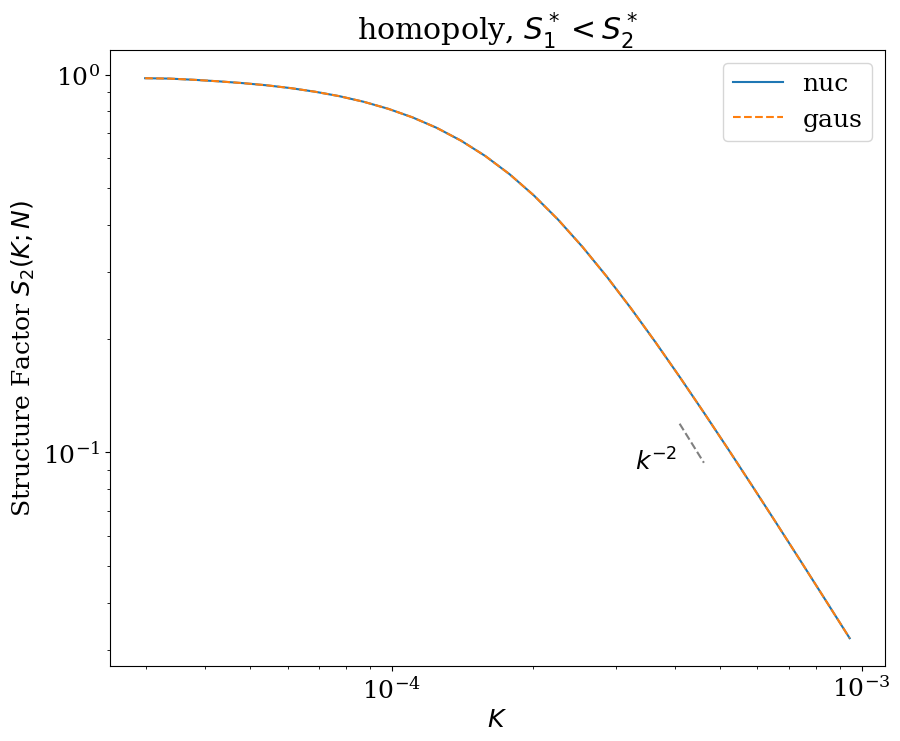

In [184]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
alh = 1
plt.plot(k_vec, homo_nuc/N**2, label = "nuc", linestyle = "-", alpha = alh)
plt.plot(k_vec, homo_gaus/N**2, label = "gaus", linestyle = "--", alpha = alh)
# plt.text(5, 0.0035, '$k^{-2}$')
# plt.text(5.5, 0.0015, '$k^{-2}$')

plt.xscale('log')
plt.yscale('log')

plt.title("homopoly, $S_1^* < S_2^*$")
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-3, 1e2))

low = 22
high = 24
plt.plot(k_vec[low:high], 0.00000002*k_vec[low:high]**-2, linestyle = "--", color = "grey")
plt.text(.00033, 0.09, '$k^{-2}$')

plt.legend()

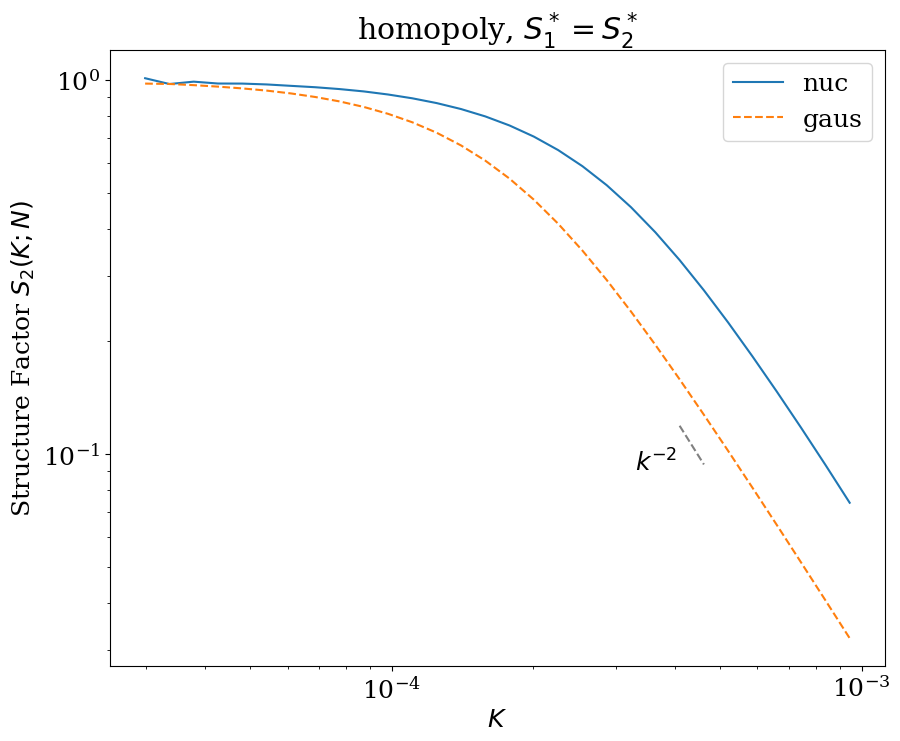

In [188]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
alh = 1
plt.plot(k_vec, homo_nuc/N**2, label = "nuc", linestyle = "-", alpha = alh)
plt.plot(k_vec, homo_gaus/N**2, label = "gaus", linestyle = "--", alpha = alh)
# plt.text(5, 0.0035, '$k^{-2}$')
# plt.text(5.5, 0.0015, '$k^{-2}$')

plt.xscale('log')
plt.yscale('log')

plt.title("homopoly, $S_1^* = S_2^*$")
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-3, 1e2))

low = 22
high = 24
plt.plot(k_vec[low:high], 0.00000002*k_vec[low:high]**-2, linestyle = "--", color = "grey")
plt.text(.00033, 0.09, '$k^{-2}$')

plt.legend()

In [11]:
inc_gamma(2, dlt**(2/3)*xm_small)

0.9661254567011229

In [15]:
inc_gamma(2, (dlt+1)**(2/3)*xm_big)

1.1110621113412872e-11

In [16]:
sp.special.erf((dlt)**(1/3)*xm_big**0.5)

0.9999999999999606

In [ ]:
inc_gamma(1, 2)

In [ ]:
# converting kuhn lenght form one vaulle to another

In [37]:
# load sf mat

ID = -16.9
settings = np.load(r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\old_gaussian_prop\ID=%s_settings.npy" % (ID), allow_pickle = True)

[chrom, [klog_min, klog_max, klog_num]] = settings

[n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N_old, N_m_old, b_old] = chrom


k_vec_old = np.logspace(klog_min, klog_max, klog_num) / b_old

homo_gaus_b106 = calc_sf2_chromo_shlk(chrom, k_vec_old)
print(b)

40


In [44]:
# load sf mat

ID = -16.9
settings = np.load(r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\old_gaussian_prop\ID=%s_settings.npy" % (ID), allow_pickle = True)

[chrom, [klog_min, klog_max, klog_num]] = settings

[n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N_old, N_m_old, b_old] = chrom

b = 40

N = N_old *b_old/b
N_m = N_m_old *b_old/b
chrom = [n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b]

k_vec = np.logspace(klog_min, klog_max, klog_num) / b

homo_gaus_b40 = calc_sf2_chromo_shlk(chrom, k_vec)
print(b)

40


In [45]:
[n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

l_p = 20 # 20 nm chromosomal DNA
bp_p_b = 45 # base pairs per bond
nm_p_bp = 0.34 # nanometetrs per base pair
b_fresh = l_p * 2 #kuhn length

N_fresh = (len(poly_marks[0])-1) * bp_p_b * nm_p_bp * (1/b_fresh)
N_m_fresh = N_fresh/(len(poly_marks[0])-1)
chrom_fresh = [n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N_fresh, N_m_fresh, b_fresh]

k_vec_fresh = np.logspace(klog_min, klog_max, klog_num) / b_fresh

homo_gaus_fresh = calc_sf2_chromo_shlk(chrom_fresh, k_vec_fresh)

In [46]:
N_old

36647.974528301886

In [47]:
N

97117.13249999999

In [48]:
N_fresh

97117.1325

In [62]:
homo_nuc_fresh = calc_sf2_nuclear_tower(chrom_fresh, k_vec_fresh)

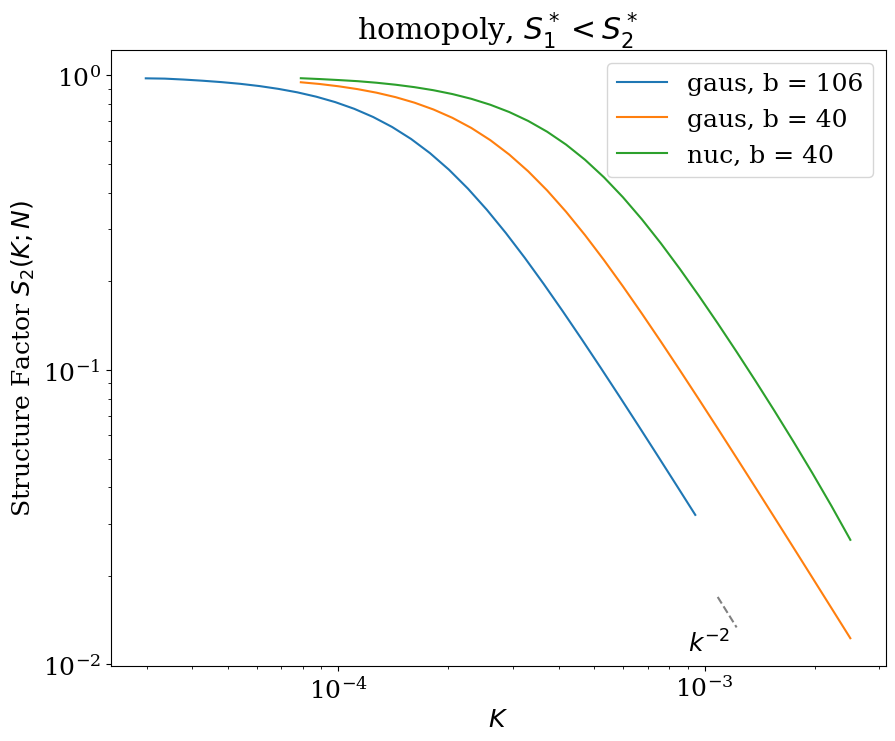

In [73]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
alh = 1
# plt.plot(k_vec, homo_nuc/N**2, label = "nuc", linestyle = "-", alpha = alh)
plt.plot(k_vec_old, homo_gaus_b106/N_old**2, label = "gaus, b = " + str(b_old), linestyle = "-", alpha = alh)
# plt.plot(k_vec, homo_gaus_b40/N**2, label = "converted, b = " + str(b), linestyle = "-", alpha = alh)
plt.plot(k_vec_fresh, homo_gaus_fresh/N_fresh**2, label = "gaus, b = " + str(b_fresh), linestyle = "-", alpha = alh)
plt.plot(k_vec_fresh, homo_nuc_fresh/N_fresh**2, label = "nuc, b = " + str(b_fresh), linestyle = "-", alpha = alh)
# plt.plot(k_vec, homo_gaus_b106*(b_old/b)/N**2, label = "data conv_b = " + str(b_old), linestyle = "dotted", alpha = alh)

# plt.text(5, 0.0035, '$k^{-2}$')
# plt.text(5.5, 0.0015, '$k^{-2}$')

plt.xscale('log')
plt.yscale('log')

plt.title("homopoly, $S_1^* < S_2^*$")
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-3, 1e2))

low = 22
high = 24
plt.plot(k_vec[low:high], 0.00000002*k_vec[low:high]**-2, linestyle = "--", color = "grey")
plt.text(.0009, 0.011, '$k^{-2}$')

plt.legend()